In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# This sets the size and properties of the plots when using matplotlib.pyplot
plt.style.use([{
    "figure.figsize":(9,6),
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.fontsize": "x-large",
    "axes.labelsize": "x-large",
    "axes.titlesize": "xx-large",
    "axes.spines.top": False,
    "axes.spines.right": False,
    # "ytick.major.right":False,
    # "xtick.major.top":False
},'seaborn-poster'])

In [30]:
temp_df = pd.read_csv("./data/temperature.csv")
temp_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [31]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           45253 non-null  object 
 1   Vancouver          44458 non-null  float64
 2   Portland           45252 non-null  float64
 3   San Francisco      44460 non-null  float64
 4   Seattle            45250 non-null  float64
 5   Los Angeles        45250 non-null  float64
 6   San Diego          45252 non-null  float64
 7   Las Vegas          45252 non-null  float64
 8   Phoenix            45250 non-null  float64
 9   Albuquerque        45252 non-null  float64
 10  Denver             45252 non-null  float64
 11  San Antonio        45252 non-null  float64
 12  Dallas             45249 non-null  float64
 13  Houston            45250 non-null  float64
 14  Kansas City        45252 non-null  float64
 15  Minneapolis        45240 non-null  float64
 16  Saint Louis        452

1. plot a histogram with 100 bins using all the samples to represesnt Detroit

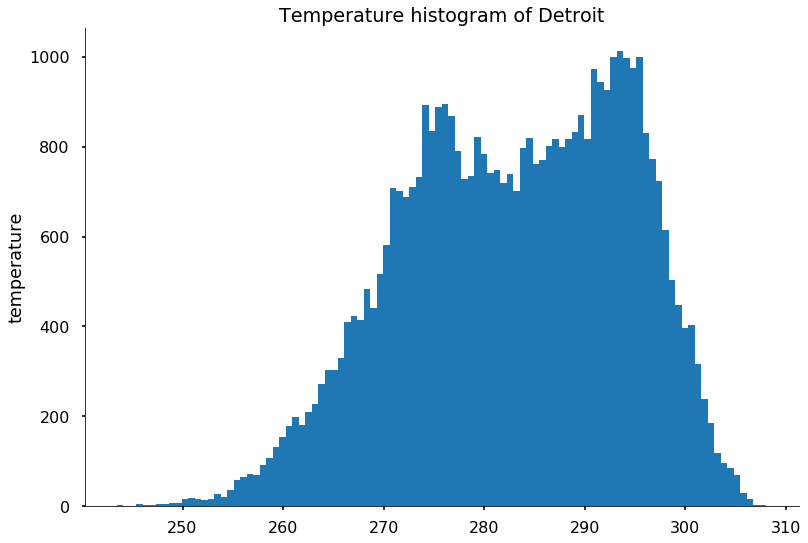

In [8]:
temp_df = temp_df.dropna()
detroit_df = temp_df['Detroit']

plt.hist(detroit_df, bins=100)
plt.title('Temperature histogram of Detroit')
plt.ylabel('temperature')
plt.show()

2. PDF's approximate the distribution of the data in Q1 as closely as possible

In [58]:
# retrieve the quter temperature 
import datetime as dt

temp_df['datetime'] = pd.to_datetime(temp_df['datetime'])

q1_df = temp_df[temp_df['datetime'].dt.quarter == 1]

q1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10824 entries, 2196 to 39419
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           10824 non-null  datetime64[ns]
 1   Vancouver          10822 non-null  float64       
 2   Portland           10824 non-null  float64       
 3   San Francisco      10824 non-null  float64       
 4   Seattle            10824 non-null  float64       
 5   Los Angeles        10822 non-null  float64       
 6   San Diego          10824 non-null  float64       
 7   Las Vegas          10824 non-null  float64       
 8   Phoenix            10822 non-null  float64       
 9   Albuquerque        10824 non-null  float64       
 10  Denver             10824 non-null  float64       
 11  San Antonio        10824 non-null  float64       
 12  Dallas             10822 non-null  float64       
 13  Houston            10822 non-null  float64       
 14  Kan

In [61]:
# extract the columns
q1_df.columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')

In [63]:
#q1 temperature only
q1_temp_df = q1_df[['Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem']]

q1_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10824 entries, 2196 to 39419
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vancouver          10822 non-null  float64
 1   Portland           10824 non-null  float64
 2   San Francisco      10824 non-null  float64
 3   Seattle            10824 non-null  float64
 4   Los Angeles        10822 non-null  float64
 5   San Diego          10824 non-null  float64
 6   Las Vegas          10824 non-null  float64
 7   Phoenix            10822 non-null  float64
 8   Albuquerque        10824 non-null  float64
 9   Denver             10824 non-null  float64
 10  San Antonio        10824 non-null  float64
 11  Dallas             10822 non-null  float64
 12  Houston            10822 non-null  float64
 13  Kansas City        10824 non-null  float64
 14  Minneapolis        10812 non-null  float64
 15  Saint Louis        10824 non-null  float64
 16  Chicago            

In [81]:
# plot the historgram to observe the distribution
temp_s = pd.Series()
for city in ['Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem']:
    temp_s.append(q1_df[city], ignore_index=True)

temp_s
# one_df.plot.hist(bins=101)
# plt.xlabel('Temperature')
# plt.ylabel('Frequency')
# plt.title('Histogram of Quater 1 Temperature for all Cities')
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Series([], dtype: float64)